In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import nan

In [2]:
lebanon = pd.read_csv('data/clean_data/population-lebanon.csv')

#source = http://www.worldometers.info/world-population/lebanon-population/

In [5]:
refugees_lebanon = pd.read_csv('data/clean_data/syr-reg_ref_by_date-lebanon.csv')

#source = https://data2.unhcr.org/en/situations/syria/location/71

refugees_lebanon['first of year'][1] = refugees_lebanon['individuals'][1]

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
refugees_lebanon = refugees_lebanon.dropna()

In [9]:
lebanon = lebanon.dropna()


In [10]:
refugees_lebanon =refugees_lebanon.reset_index()

In [11]:
refugees_lebanon['Date'] = 0

In [12]:
for i in range(len(refugees_lebanon)):

    refugees_lebanon['Date'][i] = float(refugees_lebanon['data_date'][i][-4:])

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
refugees_lebanon = refugees_lebanon.rename(columns={'Date': 'Year'})

In [14]:
lebanon = lebanon.reset_index()

In [15]:
type(lebanon['Year'][0])

numpy.float64

In [16]:
lebanon = lebanon.merge(refugees_lebanon, on='Year')

In [17]:
lebanon

,index_x,Year,Population,Yearly %,Yearly,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban,Urban Population,Country's Share of,World Population,Lebanon,index_y,data_date,individuals,first of year
0,2,2018.0,6093509.0,0.18%,"11,152","-30,000",29.0,1.71,596.0,72.00%,"4,386,037",0.08%,"7,632,819,325",112,467,1/31/2018,995512,995512.0
1,3,2017.0,6082357.0,1.26%,"75,689","-30,000",29.0,1.71,595.0,73.00%,"4,437,679",0.08%,"7,550,262,101",111,464,6/30/2017,1001051,1001051.0
2,4,2016.0,6006668.0,2.65%,"155,189","-30,000",29.0,1.71,587.0,74.30%,"4,461,385",0.08%,"7,466,964,280",111,458,1/31/2016,1067785,1067785.0
3,5,2015.0,5851479.0,6.17%,"302,868","250,000",28.5,1.72,572.0,75.80%,"4,436,670",0.08%,"7,383,008,820",112,397,1/2/2015,1146911,1146911.0


Text(0, 0.5, 'Refugees as a percent of total Population')

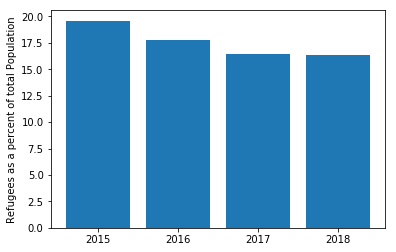

In [18]:
#plt.bar(turkey['Year'], turkey['Population']/1000000)


plt.bar(round(lebanon['Year']), (lebanon['individuals']/100)/(lebanon['Population']/10000))
plt.xticks([2015, 2016, 2017, 2018])

plt.ylabel('Refugees as a percent of total Population')

#This is probably the best chart to show a crisis. The bottom chart is a bit underwhelming.

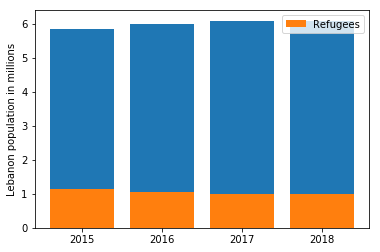

In [19]:
plt.bar(lebanon['Year'], lebanon['Population']/1000000)
plt.xticks([2015, 2016, 2017, 2018])
plt.bar(lebanon['Year'], lebanon['individuals']/1000000, label="Refugees")
plt.ylabel('Lebanon population in millions')
plt.legend()